In [6]:
from kaleido.scopes.plotly import PlotlyScope
import optuna
import plotly
import plotly.express as px
import pandas as pd
import imp  
import customplots as cplot
imp.reload(cplot)
import plotly.graph_objects as go
study = optuna.create_study(study_name='Study_ALL', storage='sqlite:///../feature_extraction/optuna_median.db',load_if_exists=True)



[I 2020-07-20 20:01:34,233] Using an existing study with name 'Study_ALL' instead of creating a new one.


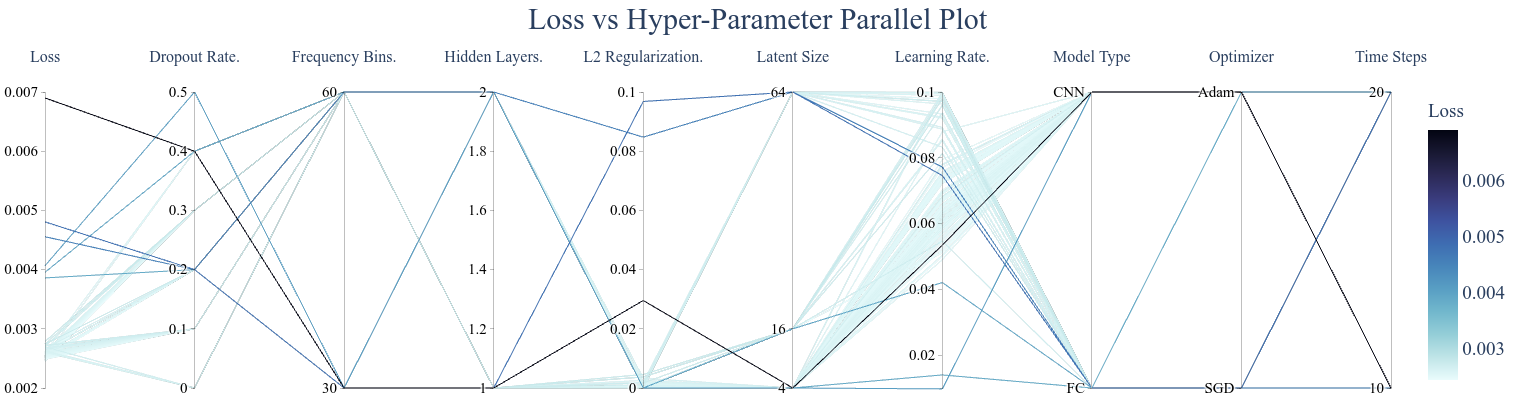

In [219]:
imp.reload(cplot)

fig=cplot.get_parallel_coordinate_plot(study,coloring="ice_r")
scope = PlotlyScope()
fig= fig.update_layout(   
    autosize=False,title_text='Loss vs Hyper-Parameter Parallel Plot', title_x=0.5, title_y=0.98, 
    template="plotly_white",
    width=1300,
    height=400,
    font_family="Times New Roman",
    font_size=19,
    title_font_family="Times New Roman",
    title_font_size=30,           
       margin=dict(l=45, t=90,r=1,  b=10),
    )
fig.update_traces()
with open("parallel_coord.svg", "wb") as f:
    f.write(scope.transform(fig, format="svg", width=1400,height=450,))
fig

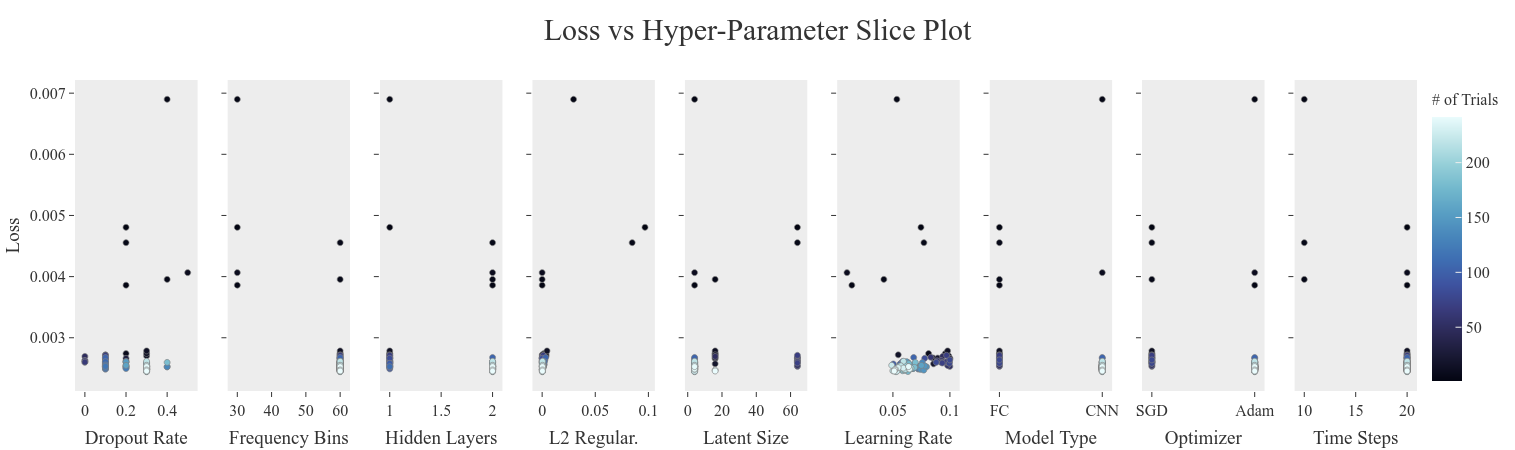

In [217]:
imp.reload(cplot)
fig=cplot.get_slice_plot(study,objective_value="Loss")
fig.update_layout(
    autosize=False,title_text='Loss vs Hyper-Parameter Slice Plot', title_x=0.5, 
    template="ggplot2",
    width=1300,
    height=450,
    font_family="Times New Roman",
    font_size=16,
    title_font_family="Times New Roman",
    title_font_size=30,
    margin=dict(l=0, t=80,r=1,  b=1),
                                        
    )

fig.update_yaxes(showgrid=False,zeroline=False)
fig.update_xaxes(showgrid=False,zeroline=False)
fig.update_traces(marker=dict(colorscale="ice"))

with open("slice_plot.svg", "wb") as f:
    f.write(scope.transform(fig, format="svg", width=1400,height=450,))

fig


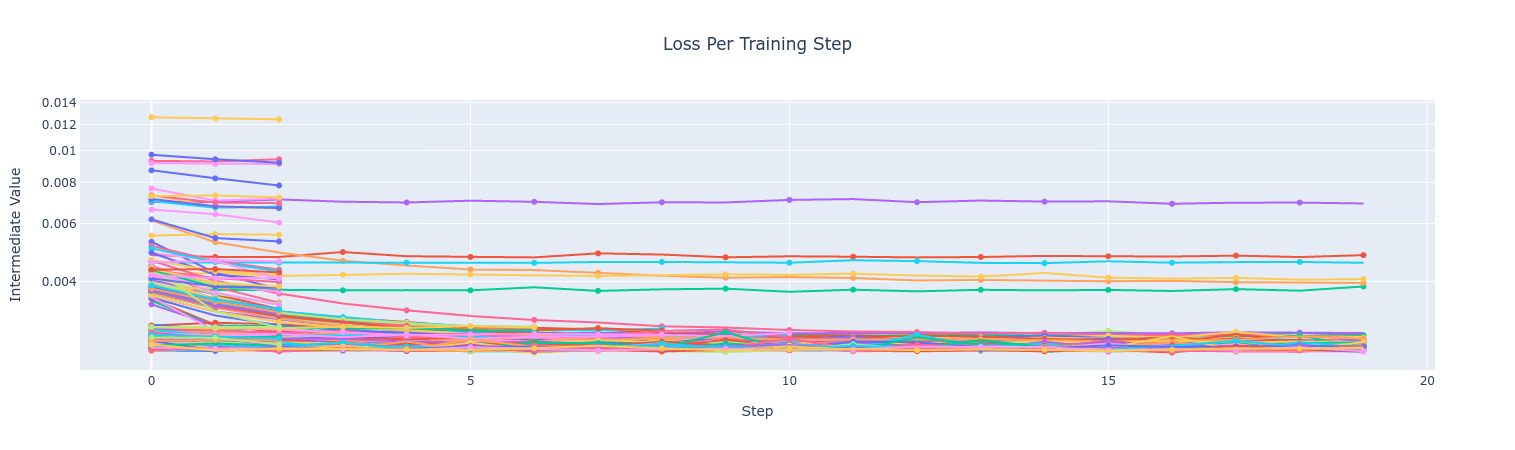

In [178]:
scope = PlotlyScope()

fig=optuna.visualization.plot_intermediate_values(study)
fig.update_layout(title_text='Loss Per Training Step', title_x=0.5,yaxis_type="log")
with open("loss_per_training.svg", "wb") as f:
    f.write(scope.transform(fig, format="svg"))
fig

In [179]:
optuna.importance.get_param_importances(study)


/home/asalimi/miniconda3/lib/python3.7/site-packages/optuna/_experimental.py:61: ExperimentalWarning:

get_param_importances is experimental (supported from v1.3.0). The interface can change in the future.

/home/asalimi/miniconda3/lib/python3.7/site-packages/optuna/_experimental.py:83: ExperimentalWarning:

MeanDecreaseImpurityImportanceEvaluator is experimental (supported from v1.5.0). The interface can change in the future.



OrderedDict([('L2 Regularization', 0.6811010769020397),
             ('Frequency Bins', 0.15684541532579452),
             ('Time Steps', 0.06684923732316908),
             ('Optimizer', 0.03376995641333401),
             ('Model Type', 0.030705207764460812),
             ('Learning Rate', 0.01792473836213705),
             ('Latent Size', 0.012804367909064902),
             ('Hidden Layers', 0.0),
             ('Dropout Rate', 0.0)])

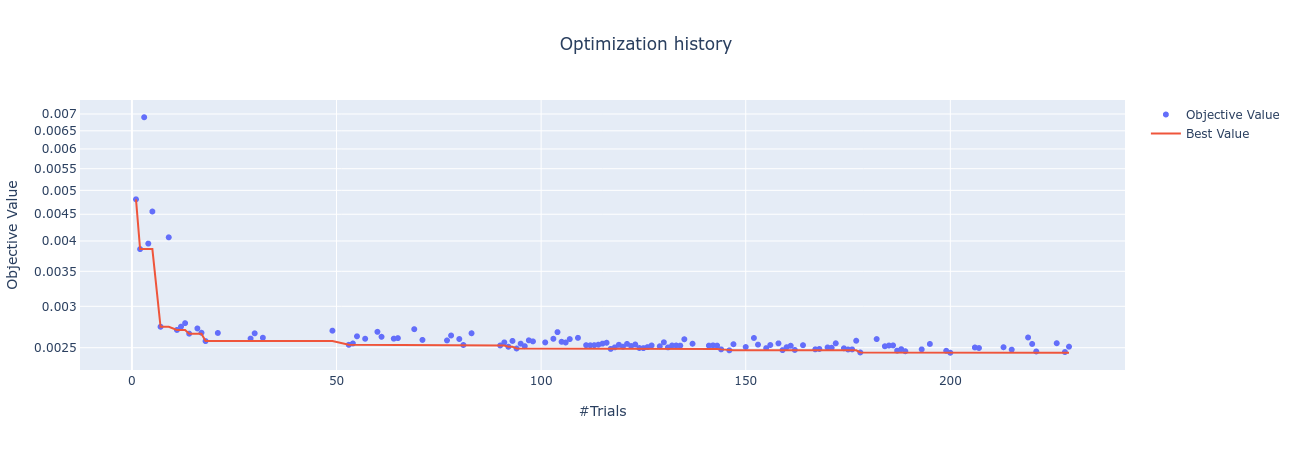

In [181]:
fig = optuna.visualization.plot_optimization_history(study)
fig.update_layout(title_text='Optimization history', title_x=0.5,yaxis_type="log")


In [ ]:
print('Best trial until now:')
print(' Value: ', study.best_trial.value)
print(' Params: ')
for key, value in study.best_trial.params.items():
    print(f'    {key}: {value}')


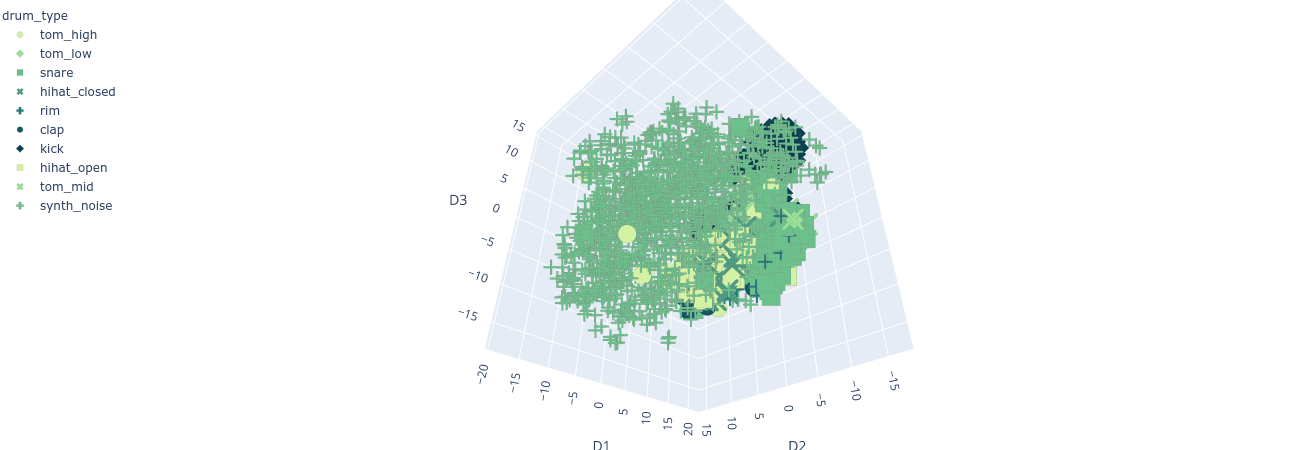

In [249]:

scope = PlotlyScope()
df=pd.read_csv("../feature_extraction/csvs/df_8.csv",index_col=False)
# fig = px.scatter_3d(df, x="D1",y="D2",z="D3",color="label",symbol="drum_type",hover_data=["path"],color_discrete_sequence=px.colors.qualitative.Dark2)
fig = px.scatter_3d(df, x="D1",y="D2",z="D3",color="drum_type",symbol="drum_type",hover_data=["path"],color_discrete_sequence= px.colors.sequential.Emrld)
fig.update_layout(scene = dict(
                    camera=dict(eye=dict(x=-1.2, y=-1.2, z=-1.2)),
                    aspectmode="cube",),
                    margin=dict( r=0, l=0, b=0, t=0),
                  showlegend=True,
              legend=dict(
                yanchor="top",
                y=0.99,
                xanchor="right",
                x=0.01
            ),

                 )
fig.update_traces(marker=dict(size=6,opacity=1,line=dict(width=0.2,color='grey')))
g=fig
fig.show()


with open("3d_t-SNE.svg", "wb") as f:
    f.write(scope.transform(fig, format="svg"))